# Download pictures to your program folder:
#### Chapman.jpg, Fenton.jpg, Peterson.jpg, Condon.jpg,
#### Lillis.jpg, Willamette.jpg

# 1)  Get data
## Get a dictionary of some UO buildings
#### Each value is a short list - year built, current use

In [2]:
# we want a dictionary with entries like this
# { 'Lillis': [2003, 'Lundquist Business College',]
#   'Fenton': [1906, 'Mathematics']}

UO_dictionary = \
    {'Chapman': [1939, 'Honors College'],
     'Fenton': [1906, 'Mathematics'],
     'Peterson': [1916, 'Business'], 
     'Condon': [1925, 'Geography, Anthropolgy'],
     'Deschutes': [1990, 'Computer Science'],
     'Lillis': [2003, 'Business College'],
     'Willamette': [1990, 
        'Physics - General, Materials Science, Theoretical']}

for building in sorted(UO_dictionary):
    data_list = UO_dictionary[building]  # building is key; list is value
    year = data_list[0]
    note = data_list[1]
    print(building, year, note)
#

Chapman 1939 Honors College
Condon 1925 Geography, Anthropolgy
Deschutes 1990 Computer Science
Fenton 1906 Mathematics
Lillis 2003 Business College
Peterson 1916 Business
Willamette 1990 Physics - General, Materials Science, Theoretical


#### Make data line up in columns with .format

In [3]:
# Make report look better

for building in sorted(UO_dictionary):
    # value     dictionary [key]
    data_list = UO_dictionary[building]  
    year = data_list[0]
    note = data_list[1]
    #    string len 15    4 digits string
    print("{0:12s} built {1:4d} {2:s}" \
          .format(building, year, note))
#                   0        1      2

Chapman      built 1939 Honors College
Condon       built 1925 Geography, Anthropolgy
Deschutes    built 1990 Computer Science
Fenton       built 1906 Mathematics
Lillis       built 2003 Business College
Peterson     built 1916 Business
Willamette   built 1990 Physics - General, Materials Science, Theoretical


#### Let's open a series of images

In [4]:
from PIL import Image

for building in UO_dictionary:
    file_name = building
    infile = file_name + '.jpg'
    image = Image.open(infile)
    image.show()

# 2) Create thumbnails of images
#### Open images, create and save thumbnail images

In [4]:
from PIL import Image

for building in UO_dictionary:
    file_name = building
    infile = file_name + '.jpg'
    image = Image.open(infile)

    # Create thumbnail file
    size = (128, 128)
    outfile =  file_name + '_thumbnail.jpg'
    image_thumb = image
    image_thumb.thumbnail(size)
    image_thumb.save(outfile, "JPEG")
    image_thumb.show()
#

# 3) Picture +  printed report
### Report on buildings; include a picture
### But pictures are all in separate windows!

In [5]:
for building in UO_dictionary:
    data_list = UO_dictionary[building]  
    year = data_list[0]
    note = data_list[1]

    file_name = building
    # show small images
    infile = file_name + '_thumbnail.jpg'
    image = Image.open(infile)
    print(building, year, note, infile)
    image.show()
    #    

Lillis 2003 Business College Lillis_thumbnail.jpg
Fenton 1906 Mathematics Fenton_thumbnail.jpg
Peterson 1916 Business Peterson_thumbnail.jpg
Deschutes 1990 Computer Science Deschutes_thumbnail.jpg
Willamette 1990 Physics - General, Materials Science, Theoretical Willamette_thumbnail.jpg
Chapman 1939 Honors College Chapman_thumbnail.jpg
Condon 1925 Geography, Anthropolgy Condon_thumbnail.jpg


## IPython.display can put images near text

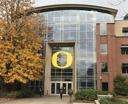

Lillis 2003 Business College
----------------------------------------------------------------------


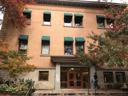

Fenton 1906 Mathematics
----------------------------------------------------------------------


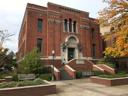

Peterson 1916 Business
----------------------------------------------------------------------


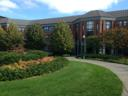

Deschutes 1990 Computer Science
----------------------------------------------------------------------


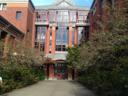

Willamette 1990 Physics - General, Materials Science, Theoretical
----------------------------------------------------------------------


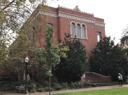

Chapman 1939 Honors College
----------------------------------------------------------------------


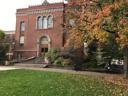

Condon 1925 Geography, Anthropolgy
----------------------------------------------------------------------


In [6]:
from IPython.display import display, Image as Im
for building in UO_dictionary:
    data_list = UO_dictionary[building]  
    year = data_list[0]
    note = data_list[1]
    
    file_name = building
    infile = file_name + '_thumbnail.jpg' # Ex: 'Lillis_thumbnail.jpg'
    an_image = Im(filename=infile) # Get image from disk

    # Display our image, then print a line of text under it:
    display(an_image)  
    
    print(building, year, note)
    print('-' * 70) # Long dashed line
#   

# <span style='color:red'>OPTIONAL</span>

# 3b) Display data,  picture with <span style='color:blue'>html</span> table
##### Writes html table; uses IPython to display the table

In [20]:
from IPython.display import display, HTML

def create_table_header():
    '''
        Returns a string of html for table header
        for building, picture, year, note
    '''
    h0 = '<table border="1">'  # table
    
    h1 = '<thead><tr>'         # table head, table row
    
    h2 = '<th style="width:80px;font-weight:bold;color:blue">'+ \
         'Building</th>'
    
    h3 = '<th style="width:136px;">Picture </th>' 
    
    h4 = '<th style="width:8px;  ">Year    </th>'
    
    h5 = '<th style="width:300px ">Notes   </th>'
    
    h6 = '</tr></thead>'
    
    html_table_header = h0 + h1 + h2 + h3 + h4 + h5 + h6    
    return html_table_header
    
def create_table_row(building, year, note):
    ''' Given a building name, year of construction and note,
    
        returns a string of html for a table row
        with a building, a thumbnail image_thumbnail and 
        year built, a note about the building;
        
        html sets a width in pixels for each item
    '''
    pic = building + '_thumbnail.jpg'  # Name of picture 

    part0 = '<tr>'                     # Start of table row    

    # <td> is html for a cell in a table ("table data")
    
    part1 = '<td style="width:80px;font-weight:bold;color:blue; ">' + \
            building + '</td>'
    
    part2 = '<td style="width:136px;">'  + \
            '<img src="' + pic + '"></td>'

    # convert year to a string (int not allowed in html)
    part3 = '<td style="width:8px; color:red">' + \
            str(year) + '</td>'        

    part4 = '<td style="width:300px">' + note + '</td>'    

    part5 = '</tr>'    

    row = part0 + part1 + part2 + part3 + part4 + part5    
    return row
              
html_title = '<h1 style="color:green">UO Buildings</h1>'
html_table_head = create_table_header()

display(HTML(html_title))
display(HTML(html_table_head))

for building in sorted(UO_dictionary):
    data_list = UO_dictionary[building]
    year = data_list[0]
    note = data_list[1]    
    # display an html table row for building
    my_row = create_table_row(building, year, note)
    display(HTML(my_row))
#
print()

Building,Picture,Year,Notes


Chapman,,1939,Honors College


Condon,,1925,"Geography, Anthropolgy"


Deschutes,,1990,Computer Science


Fenton,,1906,Mathematics


Lillis,,2003,Business College


Peterson,,1916,Business


Willamette,,1990,"Physics - General, Materials Science, Theoretical"


# <span style='color:red'>OPTIONAL</span>
# 4) Ask, display buildings
### Ask for a building, display it if it's in the dictionary

In [12]:
from IPython.display import display, HTML

def create_table_header():
    '''
        Returns a string of html for table header
        for building, picture, year, note
    '''
    h0 = '<table border="1">' 
    
    h1 = '<thead><tr>' 
    
    h2 = '<th style="width:80px; ">Building</th>'
    
    h3 = '<th style="width:136px;">Picture </th>' 
    
    h4 = '<th style="width:8px;  ">Year    </th>'
    
    h5 = '<th style="width:300px ">Notes   </th>'
    
    h6 = '</tr></thead>'
    
    html_table_header = h0 + h1 + h2 + h3 + h4 + h5 + h6
    
    return html_table_header

def create_table_row(building, year, note):
    '''Returns a string of html for a table row
       with a building, a thumbnail image name.thumbnail and 
       year built, a note about the building;
       html sets a width in pixels for each item
    '''
    pic = building + '_thumbnail.jpg'
    
    part0 = '<tr>'
    
    part1 = '<td style="width:80px;font-weight:bold;color:blue; ">' + \
            building + '</td>'

    part2 = '<td style="width:136px;">' + \
            '<img src="' + pic + '"></td>'
        
    part3 = '<td style="width:8px;color:red;">' + \
            str(year) + '</td>'
        
    part4 = '<td style="width:300px">' + note + '</td>'
    
    part5 = '</tr>'
    row = part0 + part1 + part2 + part3 + part4 + part5
    ##print("#DEBUG", row)
    return row

def show_building_data(bldg):
    '''
        Displays some data about a building and 
        displays a thumbnail image of the building
        
        returns None
    '''
    html_title = '<h1 style="color:green">UO Buildings</h1>'

    html_table_head = create_table_header()
    display(HTML(html_table_head))

    if bldg in UO_dictionary:
        data_list = UO_dictionary[bldg]
        year = data_list[0]
        note = data_list[1]
        
        # call create... to build a row in html for us
        my_row = create_table_row(bldg, year, note)
        display(HTML(my_row))
    #
    return None
#

bldg = input("Building to find, or Stop to quit ").title()

while bldg != 'Stop':
    if bldg in UO_dictionary:
        show_building_data(bldg)
    else:
        print("Sorry, data not available for", bldg)

    # Get next user request
    bldg = input("Building to find, or Stop to quit ").title()
#

Building to find, or Stop to quit Fenton


Building,Picture,Year,Notes


Fenton,,1906,Mathematics


Building to find, or Stop to quit stop
